# Task 1: Improve the image quality by applying brightness and contrast enhancement techniques.


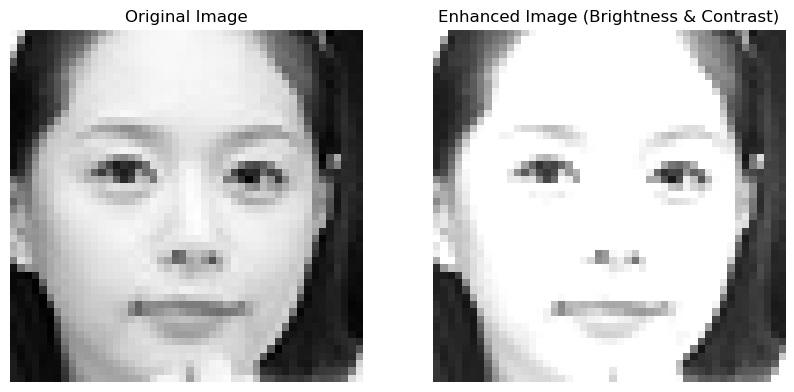

In [11]:
import cv2 as cv
from matplotlib import pyplot as plt

image_path = 'C:/REALM/Innovative Skill/Image Processing/Final exam/natural.jpg'
img = cv.imread(image_path, cv.IMREAD_COLOR)

image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

enhanced_image = cv.convertScaleAbs(img, alpha=1.2, beta=20)
enhanced_image_rgb = cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image_rgb)
plt.title('Enhanced Image (Brightness & Contrast)')
plt.axis('off')

plt.show()

# Task 2: Segment facial features to isolate eyes, mouth, and other key components.


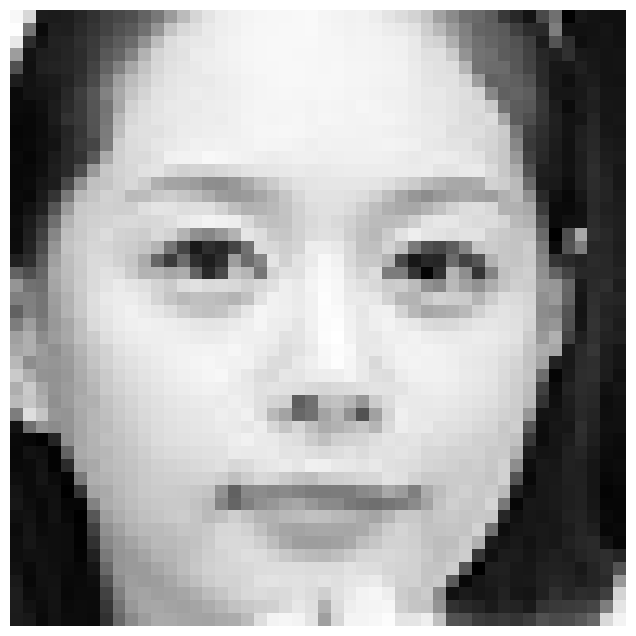

In [12]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

img = cv.imread(image_path, cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


# Task 3: Detect edges to analyze facial structures and expressions.


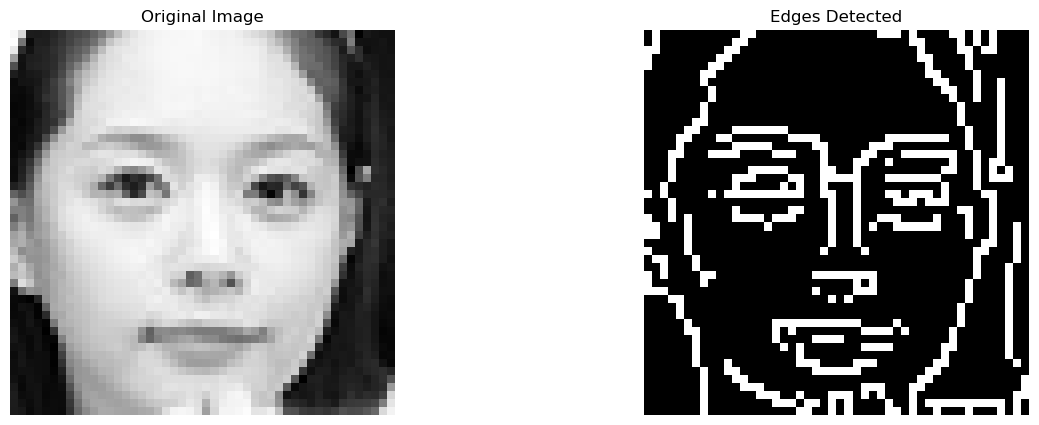

In [13]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray_image, 50, 150)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
plt.axis('off')

plt.show()


# Task 4: Use image blurring to soften non-essential features while keeping the focus on facial expressions.


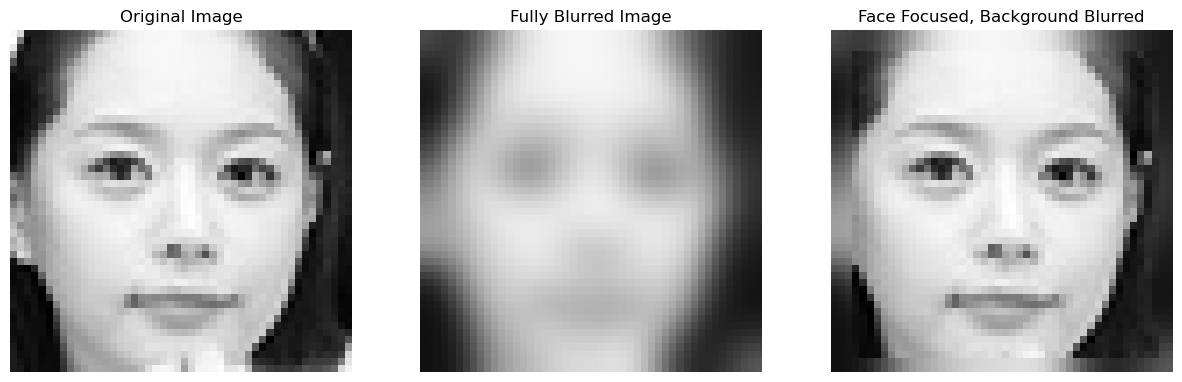

In [14]:
blurred_image = cv.GaussianBlur(img, (15, 15), 0)
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, 1.1, 5)

mask = cv.cvtColor(img, cv.COLOR_BGR2GRAY) * 0
for (x, y, w, h) in faces:
    cv.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

focused_image = cv.bitwise_and(img, img, mask=mask)
blurred_background = cv.bitwise_and(blurred_image, blurred_image, mask=cv.bitwise_not(mask))
result_image = cv.add(focused_image, blurred_background)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB))
plt.title("Fully Blurred Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title("Face Focused, Background Blurred")
plt.axis('off')

plt.show()
